In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import unet
from unet import utils
from unet.datasets import circles

In [2]:
unet_model = unet.build_model(channels=circles.channels,
                              num_classes=circles.classes,
                              layer_depth=3,
                              filters_root=16)
unet.finalize_model(unet_model)

2023-04-03 19:26:20.410625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-03 19:26:20.416471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-04-03 19:26:20.416487: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-04-03 19:26:20.416968: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [3]:
train_dataset, validation_dataset = circles.load_data(100, nx=200, ny=200, splits=(0.7, 0.3))

In [4]:
trainer = unet.Trainer(checkpoint_callback=False)
trainer.fit(unet_model,
            train_dataset,
            validation_dataset,
            epochs=5,
            batch_size=1)

Epoch 1/5
70/70 [==============================] - ETA: 0s - loss: 0.3295 - categorical_crossentropy: 0.3295 - categorical_accuracy: 0.9204 - mean_iou: 0.4206 - dice_coefficient: 0.8122 - auc: 0.9447

2023-04-03 19:26:30.765621: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 73728000 exceeds 10% of free system memory.


70/70 [==============================] - 10s 124ms/step - loss: 0.3295 - categorical_crossentropy: 0.3295 - categorical_accuracy: 0.9204 - mean_iou: 0.4206 - dice_coefficient: 0.8122 - auc: 0.9447 - val_loss: 0.2494 - val_categorical_crossentropy: 0.2494 - val_categorical_accuracy: 0.9522 - val_mean_iou: 0.4263 - val_dice_coefficient: 0.7966 - val_auc: 0.9936 - learning_rate: 0.0010
Epoch 2/5


2023-04-03 19:26:31.366670: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 73728000 exceeds 10% of free system memory.


70/70 [==============================] - ETA: 0s - loss: 0.1422 - categorical_crossentropy: 0.1422 - categorical_accuracy: 0.9536 - mean_iou: 0.5308 - dice_coefficient: 0.9226 - auc: 0.9862

2023-04-03 19:26:38.584777: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 73728000 exceeds 10% of free system memory.


70/70 [==============================] - 7s 106ms/step - loss: 0.1422 - categorical_crossentropy: 0.1422 - categorical_accuracy: 0.9536 - mean_iou: 0.5308 - dice_coefficient: 0.9226 - auc: 0.9862 - val_loss: 0.0795 - val_categorical_crossentropy: 0.0795 - val_categorical_accuracy: 0.9522 - val_mean_iou: 0.6196 - val_dice_coefficient: 0.9589 - val_auc: 0.9946 - learning_rate: 0.0010
Epoch 3/5


2023-04-03 19:26:38.840421: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 73728000 exceeds 10% of free system memory.


70/70 [==============================] - ETA: 0s - loss: 0.1113 - categorical_crossentropy: 0.1113 - categorical_accuracy: 0.9538 - mean_iou: 0.5801 - dice_coefficient: 0.9399 - auc: 0.9911

2023-04-03 19:26:45.852481: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 73728000 exceeds 10% of free system memory.


70/70 [==============================] - 7s 103ms/step - loss: 0.1113 - categorical_crossentropy: 0.1113 - categorical_accuracy: 0.9538 - mean_iou: 0.5801 - dice_coefficient: 0.9399 - auc: 0.9911 - val_loss: 0.0751 - val_categorical_crossentropy: 0.0751 - val_categorical_accuracy: 0.9522 - val_mean_iou: 0.6365 - val_dice_coefficient: 0.9622 - val_auc: 0.9949 - learning_rate: 0.0010
Epoch 4/5
70/70 [==============================] - 7s 104ms/step - loss: 0.0941 - categorical_crossentropy: 0.0941 - categorical_accuracy: 0.9541 - mean_iou: 0.6052 - dice_coefficient: 0.9481 - auc: 0.9927 - val_loss: 0.0729 - val_categorical_crossentropy: 0.0729 - val_categorical_accuracy: 0.9522 - val_mean_iou: 0.6598 - val_dice_coefficient: 0.9663 - val_auc: 0.9950 - learning_rate: 0.0010
Epoch 5/5
70/70 [==============================] - 8s 116ms/step - loss: 0.0876 - categorical_crossentropy: 0.0876 - categorical_accuracy: 0.9647 - mean_iou: 0.6278 - dice_coefficient: 0.9526 - auc: 0.9936 - val_loss: 0.

In [5]:
prediction = unet_model.predict(validation_dataset.batch(batch_size=3))

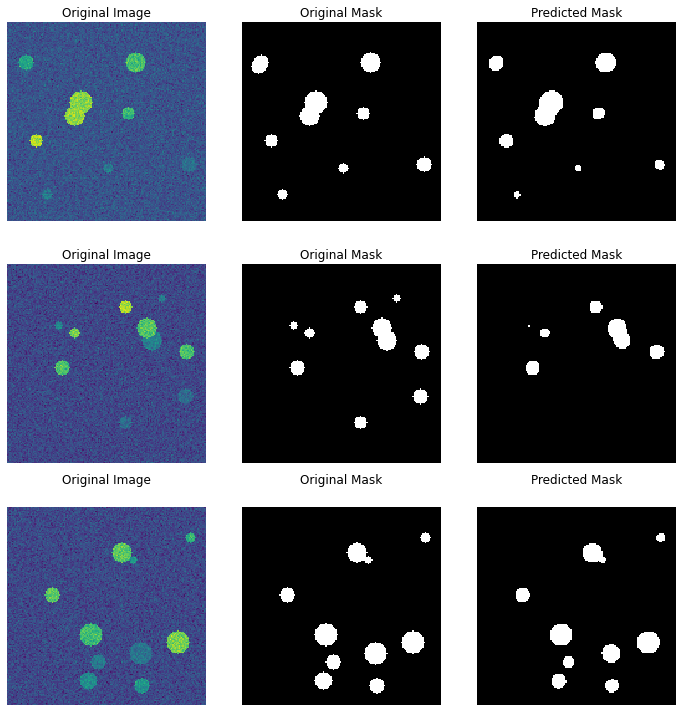

In [6]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
dataset = validation_dataset.map(utils.crop_image_and_label_to_shape(prediction.shape[1:]))

for i, (image, label) in enumerate(dataset.take(3)):
    ax[i][0].matshow(image[..., -1]); ax[i][0].set_title('Original Image'); ax[i][0].axis('off')
    ax[i][1].matshow(np.argmax(label, axis=-1), cmap=plt.cm.gray); ax[i][1].set_title('Original Mask'); ax[i][1].axis('off')
    ax[i][2].matshow(np.argmax(prediction[i,...], axis=-1), cmap=plt.cm.gray); ax[i][2].set_title('Predicted Mask'); ax[i][2].axis('off')
plt.tight_layout()